# Importing modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics


In [7]:
# Function to perform one-hot encoding for categorical variables
def one_hot_encode(data, columns):
    return pd.get_dummies(data, columns=columns, drop_first=True)


In [10]:
# Function to evaluate and plot regression results
def evaluate_and_plot(model, X_train, Y_train, X_test, Y_test):
    
    # Prediction on training data
    training_data_prediction = model.predict(X_train)
    
    # R-squared Error
    error_score = metrics.r2_score(Y_train, training_data_prediction)
    print("R-squared Error: ", error_score)
    plt.scatter(Y_train, training_data_prediction)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual Prices vs Predicted Prices (Training Data)")
    plt.show()
    
    # Prediction on test data
    test_data_prediction = model.predict(X_test)
    
    # R-squared Error
    error_score = metrics.r2_score(Y_test, test_data_prediction)
    print("R-squared Error: ", error_score)
    plt.scatter(Y_test, test_data_prediction)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual Prices vs Predicted Prices (Test Data)")
    plt.show()

# Loading Data

In [14]:
# Load the car dataset
car_dataset = pd.read_csv(r"C:\Users\91767\Downloads\archive cardata\car data.csv")


# Preprocessing Data

In [15]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']
car_dataset = one_hot_encode(car_dataset, columns=categorical_columns)


# Classification of features  

In [16]:
# Separate features and target variable
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

# Training and Testing

In [17]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


In [18]:
# Create and fit a Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

# Data visualization through Barplot

R-squared Error:  0.8823856405331212


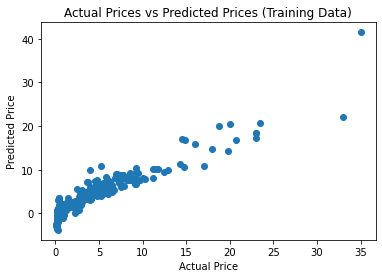

R-squared Error:  0.8694567179819466


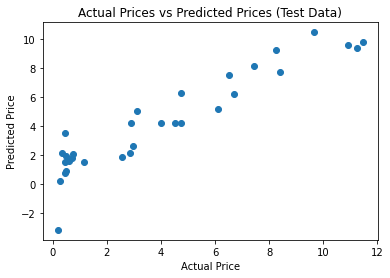

In [19]:
# Evaluate and plot linear regression results
evaluate_and_plot(lin_reg_model, X_train, Y_train, X_test, Y_test)


In [20]:
# Create and fit a Lasso Regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

R-squared Error:  0.8424480718240743


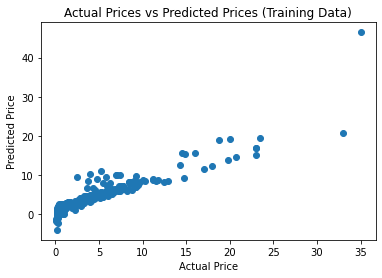

R-squared Error:  0.8709763132343395


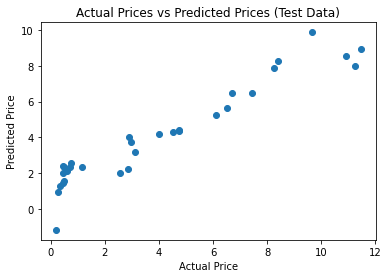

In [21]:
# Evaluate and plot lasso regression results
evaluate_and_plot(lasso_reg_model, X_train, Y_train, X_test, Y_test)